<a href="https://colab.research.google.com/github/Icrz11/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://cs.uit.edu.vn/data3.txt

--2020-06-13 00:33:25--  http://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt.1’

data3.txt.1         100%[===================>] 174.70K   199KB/s    in 0.9s    

2020-06-13 00:33:28 (199 KB/s) - ‘data3.txt.1’ saved [178891/178891]



Dùng lệnh wget để lấy data từ trang http://cs.uit.edu.vn/data3.txt về, data được lấy về lưu trong colab


In [0]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

Thêm vào các thư viện cần thiết



In [0]:
df = pd.read_csv ('/content/data3.txt')


In [0]:
df.head()


,37837612,4.12166
0,37395246,3.92089
1,36610827,3.21540
2,29555651,2.54506
3,25928216,2.21831
4,30423112,2.61376


Nhìn sơ qua 5 điểm dữ liệu đầu tiên


In [0]:
df.columns = ['Data', 'Time']

In [0]:
df.head()

,Data,Time
0,37395246,3.92089
1,36610827,3.21540
2,29555651,2.54506
3,25928216,2.21831
4,30423112,2.61376


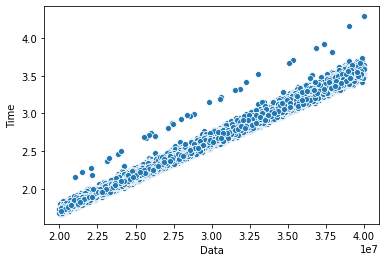

In [0]:

sns.scatterplot( df['Data'], df['Time'])

Biểu đồ biểu diễn quan hệ giữa cột Data và cột Time, hiện tại điểm biểu diễn của Data và Time không còn nằm trong 1 đường thẳng nữa mà đã tách thành 2 đường


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10589 entries, 0 to 10588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    10589 non-null  int64  
 1   Time    10589 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 165.6 KB


Thông tin về Dataset, ta có 10589 điểm dữ liệu với 2 đặc trưng đó là Data, và Time


In [0]:
Y = df['Time']
df = df.drop(['Time'], axis = 1)

Ta sẽ lấy cột Time ra để lưu vào biến Y, yêu cầu của bài toán là khi ta có 1 dữ liệu đầu vào là Data của chương trình thì ta sẽ dự đoán được đầu ra là thời gian để chạy chương trình đó

In [0]:
df = np.array (df, dtype = np.float64)
X_train1, X_test1, y_train1, y_test1 = train_test_split (df, Y, test_size = 0.3, random_state = 30)
from sklearn.linear_model import LinearRegression

In [0]:
md = LinearRegression()
md.fit (X_train1, y_train1)
result = md.predict(X_test1)
MSE = mean_squared_error(y_test1, result)
print(MSE)

0.003311893182799956


Kiểm tra độ chính xác của model, kết quả thấp hơn ở Round 2, vì hiện tại các điểm dữ liệu không chỉ nằm trên 1 đường thẳng nữa, nên model sẽ dự đoán ra 1 đường thẳng có thể gần tất cả các điểm nhất, nhưng ở round 2 đường thẳng này trùng với đường thẳng tuyến tính của dữ liệu, còn ở round 3 này thì không nên sẽ giảm độ chính xác đi

In [0]:
tmp = df['Data']
tmp = np.array(tmp, dtype=np.float64)
print (tmp)
print (type(tmp))

[37395246. 36610827. 29555651. ... 33520323. 21243264. 21380484.]
<class 'numpy.ndarray'>


Tạo ra 1 biến tạm có tên là tmp để lưu trữ các giá trị của cột Data theo kiểu numpy-array

In [0]:
Square = (tmp**2)
nlog = [i*math.log(i) for i in tmp]
sqrt = [math.sqrt(i) for i in tmp]


Tính toán 3 biến Square(bình phương của cột Data), nlog (nlog(n) của cột Data) và sqrt(căng bậc 2 của cột Data)


In [0]:
print (Square[1])
print (len(Square))
print (nlog[1])
print (len(nlog))
print (sqrt[1])
print (len(sqrt))

1340352653623929.0
10589
637608838.8767723
10589
6050.688142682616
10589


Kiểm tra thử giá trị của 3 biến Square, nlog, sqrt cũng như độ dài của chúng


In [0]:
df['Square'] = Square
df['nlogn'] = nlog
df['Sqrt'] = sqrt

Tạo ra 3 cột mới trong bảng dữ liệu của mình để lưu trữ 3 bộ giá trị nằm trong 3 biến Square, nlog, và sqrt

In [0]:
df.head()

,Data,Square,nlogn,Sqrt
0,37395246,1.398404e+15,6.520629e+08,6115.165247
1,36610827,1.340353e+15,6.376088e+08,6050.688143
2,29555651,8.735365e+14,5.084100e+08,5436.510922
3,25928216,6.722724e+14,4.426165e+08,5091.975648
4,30423112,9.255657e+14,5.242119e+08,5515.715004


Kiểm tra lại tập dữ liệu 1 lần nữa, hiện tại đã có tổng cộng 5 cột dữ liệu


In [0]:
df = np.array (df, dtype= np.float64)

Chuyển đổi toàn bộ Dataset của ta từ dạng bảng sang dạng mảng numpy để đưa vào model


In [0]:
print (df)

[[3.73952460e+07 1.39840442e+15 6.52062929e+08 6.11516525e+03]
 [3.66108270e+07 1.34035265e+15 6.37608839e+08 6.05068814e+03]
 [2.95556510e+07 8.73536506e+14 5.08409969e+08 5.43651092e+03]
 ...
 [3.35203230e+07 1.12361205e+15 5.80828843e+08 5.78967383e+03]
 [2.12432640e+07 4.51276265e+14 3.58406800e+08 4.60904155e+03]
 [2.13804840e+07 4.57125096e+14 3.60859576e+08 4.62390355e+03]]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.3, random_state = 30)


Cắt tập dữ liệu thành 2 phần, train và test, với 30% dữ liệu nằm trong tập test

In [0]:

model = LinearRegression ()
model.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Khởi tạo model linear regression, đưa dữ liệu vào để train model

In [0]:
re = model.predict (X_test)

Cho model dự đoán tập dữ liệu test


In [0]:
acc = mean_squared_error(y_test, re)


In [0]:
print (acc)

0.0033063659294326106


Kết quả ở đây còn tệ hơn phía trên thưa thầy, em cũng không hiểu vì sau mong thầy giải đáp



In [0]:
New_data = 30000000000
def using_model (new_data):
  Square = (new_data**2)
  nlog = math.log(new_data)
  sqrt = math.sqrt(new_data)
  New = []
  New.append(new_data)
  New.append(Square)
  New.append(nlog)
  New.append(sqrt)
  New = np.array(New, dtype=np.float64)
  New = New.reshape (1,-1)
  re1 = model.predict(New)
  return re1
print (using_model(New_data))


[733115.68621333]
